# Lecture 13: AC Circuits and Transformers

---
## Learning Objectives

By the end of this lecture you should:
- Be able to explain what is meant by AC current. 
- Understand how transformers operate. 
- Be able to define electromagnetic induction, magnetic flux, and magnetic flux linkge. 
- Be able to state Faraday's and Lenz's laws and use them to calculate the induction in a coil.

---

## Alternating Current

In this course so far we have only considered direct current (DC current), which is where the current flows in one direction only. An Alternating current (AC) is a current which changes direction and amplitude as a function of tome. AC currents are the type that the grid operates with. The current (and voltage) take the form of a sine wave, which itself will have a characteristic frequency.

$ I = I_{peak} \sin{\left(\omega t\right)}, $

or

$ V = V_{peak} \sin{\left(\omega t\right)}, $

where 

$ \omega = 2 \pi f $,

where $\omega$ is the angular frequency and $f$ is the frequency. The peak voltages and currents are good values to describe an AC current as they can be determined directly by reading the maximum amplitude of the sine wave that characterises the alternating current/voltage using an oscillioscope. 

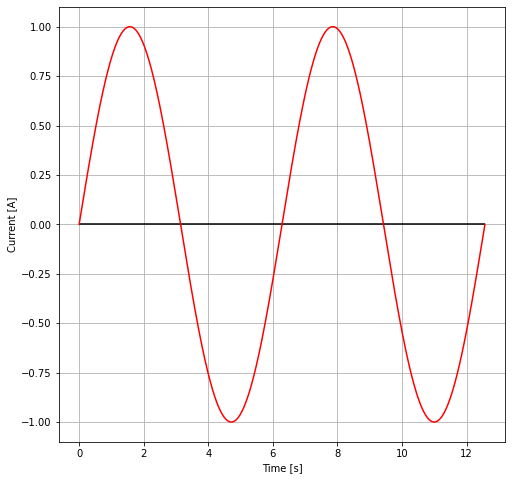

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


time = np.linspace(0, 4*np.pi, 1000)
current = np.sin(time)

fig = plt.figure(figsize=(8, 8))
plt.plot(time, current, marker = ' ', linestyle = '-', color = 'r')
plt.hlines(0, 0, 4*np.pi, color = 'k')
plt.grid()
plt.xlabel('Time [s]')
plt.ylabel('Current [A]')
plt.savefig('AC_sinwave.png', dpi = 300)
plt.show()

When looking at a circuit diagram, it is clear if an alternative current is being used as the supply will have the following symbol:

![](Figures/ACSymbol.png)

---
### Root Mean Square Averages

Another characteristic of an oscillating current/voltage is the root-mean-square (RMS) current/voltage. This is an adjusted average of the current/voltage described by the sine wave, which is more useful when performing calculations as the instantaneous current/voltage is constantly changing. The RMS current is an adjusted current as from the sine plot above it is clear that the waveform is is equal parts negative to positive, which would make the absolute average equal to zero. 

```{Warning}
This derivation of the RMS current is included below for completeness, but there is no need to memorise it for your exams. You should however, memorise the equation for the root-mean-square current and voltage.
```

To determine the RMS value of current the instantaneous current is then squared:

$ I^2 = \left( I_{peak}\sin\left(\omega t\right) \right) ^2, $

$ I^2 = I^2_{peak} \sin^2(\omega t) $

The double angle formula from trigonometry can then be used to get rid of the $\sin^2(\omega t)$ term:

$ \sin^2(\theta) = \frac{1}{2} \left( 1 - \sin(2\theta) \right), $

Therefore:

$ I^2 = I^2_{peak} \cdot \frac{1}{2} \left( 1 - \sin(2\omega t) \right), $

$ I^2 = \frac{1}{2}I^2_{peak} - \frac{1}{2}I^2_{peak}\sin(2\omega t), $

The time average value of $\sin(2\omega t)$ is zerom as half of the time the value is positive and the other half negative, this means that:

$ I^2 = \frac{1}{2}I^2_{peak}, $

$ I_{RMS} = \sqrt{\frac{1}{2}I^2_{peak}} $

$ I_{RMS} = \frac{I_{peak}}{\sqrt{2}}. $

The same is also true for the voltage output. Thus measuring the current flowing through a resistive element allows the voltage to be calculated:

$ V_{RMS} = \frac{V_{peak}}{\sqrt{2}}. $

The plot below shows the RMS voltage superimposed onto a alternating voltage waveform.

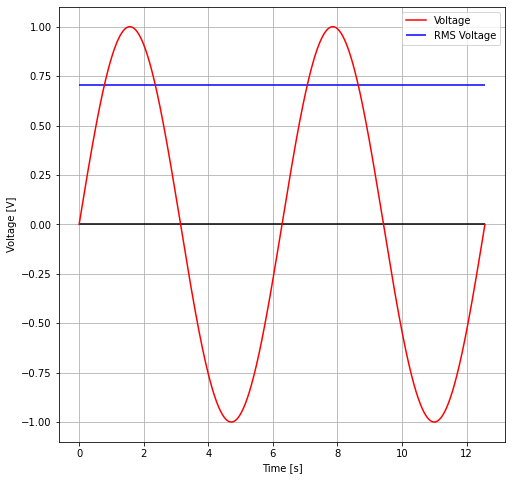

In [7]:
%matplotlib inline
fig = plt.figure(figsize=(8, 8))
plt.plot(time, current, marker = ' ', linestyle = '-', color = 'r', label = "Voltage")
plt.hlines(0, 0, 4*np.pi, color = 'k')
plt.hlines((max(current)/np.sqrt(2)), 0, 4*np.pi, color = 'b', label = "RMS Voltage")
plt.grid()
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend()
plt.savefig('AC_sinwave_rms.png', dpi = 300)
plt.show()

```{admonition} Important

The root-mean-square value is an adjusted average that can be used to characterise alterning current and voltages:

$ I_{RMS} = \frac{I_{peak}}{\sqrt{2}}, $

$ V_{RMS} = \frac{V_{peak}}{\sqrt{2}}. $

The power of an AC circuit may then be calculated as:

$ P_{RMS} = I_{RMS}V_{RMS} $

```
---
### Generating AC Current

AC current is generated by rotating a magnet in within a coil of wire (or vice versa). This is known as an alternator. 

In electricity production, electrical energy is produced by providing energy to rotate the magnet.This is typically achieved by converting water into steam. The steam then drives a turbine which provides the rotational energy to the alternator. Methods of heating the water to convert it into steam include burning fossil fuels, extracting geothermal energy, or by nuclear power. Alternators can also be driven without the need to heat up a fluid using the kinetic energy from wind turbines or hyrdoelectric damns.

The schematic below shows how the EMF which drives current is produced using an alternator. This is an example of Faraday and Lenz's law:

![](Figures/Alternator.png)

Recalling that the induced EMF is proportional to the rate of change of magnetic flux through the circuit, it is clear to see the relationship between the two lines shown on the plot. The flux here is shown to follow a cosine waveform:

$ \Phi_B = \Phi_{B,0} \cos{(\omega t)}, $

using Faraday and Lenz's law:

$\epsilon = - \frac{d \Phi_B}{dt} = - \frac{d}{dt} \Phi_{B,0} \cos{(\omega t)}, $

The differential of $\cos(\theta)$ is $-\sin(\theta)$, therefore:

$ \epsilon = - ( - \sin{(\omega t)}), $

$ \epsilon = \sin{(\omega t)}. $

Therefore we would expect the EMF to be a sine waveform, which is exactly what we see in the plot above! In the figure above, the slip rings and brushes are present to allow the coil of wire to continue to rotate without becoming twisted.

## Inductors

In previous lectures, we have briefly considered inductors, for example when conisdering LC resonance. An inductor is simply a coil of wire which produces a mangetic field. An inductor stores electrical energy in the form of magnetic energy.

COnsidering Faraday's law, any circuit with a changing current will have a **self-induced EMF** in the circuit due to the variation in magnetic flux. Considering Lenz's law, the induced EMF will oppose the change in current that induced it, thus makig variations in current more difficult. In an AC circuit, the inductor will suppress rapid variations in current. This means that inductors can be used as filters to surpress high frequency signals. 

An example of a circuit containing an inductor is an LR circuit (an inductor and a resistor) - the equations used to describe current/voltage charactersitics in an LR circuit are very similar to those for an LC circuit, however the time constant in these circuits is simply $\tau = \frac{L}{R}$.

![](Figures/LRCircuit.png)

If an LR circuit is connected to a DC supply, as shown above, as there is no change in the current flowing through it, it produces a static magnetic field. In this instance, as there is no change in magnetic flux through the the inductor there is no potential difference induced across the device... the inductor does not effectively store magnetic energy in a DC circuit and behaves as a normal wire. Inductors work most effectively when using an AC current.

## Transformers

A transformer comprises two or more inductors and a transformer core and operates via the principle of mutual induction. One of the inductors is powered using an alternating current, which in turn generates an alternating magnetic field/flux. The magnetic field is directed to the second inductor via the transformer core (this maximises efficiency). The magnetic field then induces a second alternating current across the other inductor.

![](Figures/Transformer.png)

Transformers are used to convert very large voltages to smaller, more manageable voltages, like the ones we use in our homes. The power grid uses much larger voltages than those that are needed to used in homes. The large voltage is used as it means a much smaller current is required to transport the same amount of power across the grid (P=IV). Over the gird wires, we loser power (P=I2R), but this is much less than would be lost if using a smaller voltage! 

Approximately $400\,kV$ of ENF goes through the power grid over long distances. Therefore if we want $100\,W$ of power, this would result in a current of $0.25\, mA$. Assuming a reasonable resistance, the power loss across the line will be relatively small. 

For safety reasons, we want to minimize household voltages - we must put the power through a transformer to lower the voltage going into our homes! Occasionally we want to increase the amount of voltage using transformers - for example, microwave ovens!

![](Figures/TransformerGrid.png)

In an ideal transformer, the flux is perfeclty conserved:

$ \Phi_1 = \Phi_2. $

Using Faraday and Lenz's laws the (induced) voltage in the inductor coils is calculated as:

$ V_1 = - N_1 \frac{\Delta \Phi}{\Delta t}, $

and 

$ V_2= - N_2 \frac{\Delta \Phi}{\Delta t}. $

As the rate of change of flux is the same for each indutor in an ideal transformer, the two equations can be rearranged as:

$ \frac{V_1}{N_1} = - \frac{\Delta \Phi}{\Delta t}, $

and 

$ \frac{V_2}{N_2} = - \frac{\Delta \Phi}{\Delta t}, $

therefore the equations can be equated as:

$ \frac{V_1}{N_1} = \frac{V_2}{N_2}. $

**The equation above can be used to determine the voltage step-up or step-down for transformers!**

### Transformer Losses
Whilst it may be useful to perform calculations assuming that the trasnfromer is perfectly efficient, in reality, whilst the efficiency of transformers is very high, they still lose energy from electrical losses. They are not 100% efficient. Examples of loss include:


1. **Eddy Currents** - The changing magnetic fields in the transformer core induce currents within the core leading to losses.

![](Figures/EddieCurrents.png)

2. **Magnetic Field Leakage** - The magnetic field may not be completely contained between coils and may generate currents in other surrounding conducting materials.


3. **Winding Resistance** - Current flowing through the windings of the inductors causes resistive heating and energy being radiated away.


4. **Mechanical losses** - The alternating B-field causes fluctuating EM forces between the coils of wire, transformer core and surrounding metals - this induces vibrations and noise (energy consumption).


5. **Hysteresis loss** - In an AC field, the magnetization cannot change as rapidly as the AC field which leads to energy loss due to this lag.


--- 
## Questions

```{Warning}
**Atempt the questions before looking at the solutions otherwise you will not learn!** 


Students who look at mark schemes without going through the motions of a question often think "*yes, that's what I would have done*", but are then unable to perfom on exams as the knowledge was never consolidated through practise.
```

```{admonition} Note
Units have been omitted in calculations below for simplicity. Ensure you know what each value represents.
```

---
### Question 1

An AC current is supplied to a circuit containing a $12.0 \, \Omega$ resistor. An oscilloscope measures the voltage across the resistor as a function of time. The peak voltage measured is $36.0 \, V$. Determine the average power produced by the resistor. 

```{admonition} Q1 Solution
:class: dropdown

The first thing to do is determine the average volage, the RMS voltage:

$ V_{RMS} = \frac{V_{peak}}{\sqrt{2}}, $

$ V_{RMS} = \frac{36.0}{\sqrt{2}}, $

$ V_{RMS} =  25.5 \, V.$

Next, using the resistance, the average current can be determined using Ohms law:

$ I_{RMS} = \frac{V_{RMS}}{R}, $

$ I_{RMS} = \frac{25.5}{12.0}, $

$ I_{RMS} = 2.12 \, A. $

Finally the power can be determined:

$ P = I_{RMS} V_{RMS}, $

$ P = 54.1 \, W. $
```

### Question 2

A transformer has 500 turns of wire on the primary winding and 10.0 turns of wire on the secondary winding. 

- a) Determine the secondary voltage if the primary voltage is $120\, V$.
- b) Determine the current in the primary and secondary winding given that the secondary winding is connected to a resistance load of $15.0\, \Omega$.

```{admonition} Q2a Solution
:class: dropdown

To solve this question we simply use the transformer equation:

$\frac{V_1}{N_1} = \frac{V_2}{N_2},$

$ V_2 = \frac{V_1N_2}{N_1}, $

$ V_2  = \frac{120 \times 10}{500}, $

$ V_2 = 2.40 \, V. $

```

```{admonition} Q2b Solution
:class: dropdown

First, we can determine the current flowing through the second winding using Ohm's law:

$ I_2 = \frac{V_2}{2}, $

$ I_2 = \frac{2.4}{15}, $

$ I_2 = 0.160 \, A. $

The current in the primary coil can be determined if we assume that the transformer is lossles, meaning that the power in one coil is equal to that in the other:

$ P_1 = P_2, $

$ I_1 V_1 = I_2 V_2, $

$ I_1 = \frac{I_2V_2}{V_1}, $

$ I_1 = \frac{0.16 \times 2.4}{120}, $

$ I_1 = \frac{0.16 \times 2.4}{120}, $

$ I_1 = 0.0032 \, A, $

$ I_1 = 3.20 \, mA. $

```


